# NLP - Project 1
## Rinehart Analysis
**Team**: *Jean Merlet, Konstantinos Georgiou, Matt Lane*

Check out the **[README](https://github.com/NLPaladins/rinehartAnalysis/blob/main/README.md)**


Or the current **[TODO](https://github.com/NLPaladins/rinehartAnalysis/blob/main/TODO.md)** list.

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/NLPaladins/rinehartAnalysis.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [3]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/rinehartAnalysis')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### At any point, to save changes
click **File > Save a copy on Gihtub**

### Now go to files on the left, and open:
- rinehartAnalysis/confs/proj_1.yml

(Ctr+s) to save changes

## Load Libraries and setup

### Libraries Overview
All the libraries are located under *"\<project root>/nlp_libs"*
- ***ProcessedBook***: Loc: **books/processed_book.py**, Desc: *Book Pre-processor*
- ***Configuration***: Loc: **configuration/configuration.py**, Desc: *Configuration Loader*
- ***ColorizedLogger***: Loc: **fancy_logger/colorized_logger.py**, Desc: *Logger with formatted text capabilities*

In [4]:
# Imports
%load_ext autoreload
%autoreload 2
import traceback
import argparse
import re
from importlib import reload as reload_lib
from pprint import pprint
import numpy as np

# Custom libs
from nlp_libs import Configuration, ColorizedLogger

In [5]:
# The path of configuration and log save path
config_path = "confs/proj_1.yml"  # Open files > confs > proj_1.yml to edit temporalily. Commit to save permanently
# !cat "$config_path"
log_path = "logs/proj_1.log"  # Open files > logs > proj_1.log to debug logs of previous runs
# The logger
logger = ColorizedLogger(logger_name='Notebook', color='cyan')
ColorizedLogger.setup_logger(log_path=log_path, debug=False, clear_log=True)
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
# pprint(books)  # Pretty print the books dict

2021-09-27 00:16:16 FancyLogger  INFO     Logger is set. Log file path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/logs/proj_1.log
2021-09-27 00:16:16 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:16 Config       INFO     Configuration Tag: proj1


# Analysis Functions

In [6]:
import nlp_libs.books.processed_book as proc
import nlp_libs.books.book_extractor as extr

# Plotting Functions

In [7]:
import nlp_libs.books.plotter as pl

# Circular Staircase - Analysis

In [8]:
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
title, metadata = list(books.items())[0]
# Create ProcessedBook Object
book = proc.ProcessedBook(title=title, metadata=metadata)
logger.info(f"URL: {book.url}")

2021-09-27 00:16:16 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:16 Config       INFO     Configuration Tag: proj1
2021-09-27 00:16:19 Notebook     INFO     URL: https://www.gutenberg.org/files/434/434-0.txt


In [9]:
# The three words preceding, and the three words following the mention of a perpetrator
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)
perp_three_words = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=False)
for name, results in perp_three_words.items():
    for sent_frag in np.unique(results[2]):
        print(sent_frag)

a relief when mrs. watson tapped at the
and reported that mrs. watson was in a
and seemed frightened. mrs. watson made some tea
and with him mrs. watson, the housekeeper
around the house. mrs. watson herself was a
babys nursing bottle. mrs. watson was fixing a
but just now mrs. watsons face was an
charity hospital that mrs. watson was dying, and
de club. did mrs. watson say that anything
dragged along slowly. mrs. watson came to my
forced money from anne watson instead until she
from the start. “mrs. watson went into her
her name was anne watson, and i dined
her presence known. mrs. watson and thomas had
house and brought mrs. watson, and they talked
i ran after mrs. watson. its down to
iron bed, lay mrs. watson. she was very
little before three, mrs. watson started up to
my talk with mrs. watson, and i dressed
of nervous shock. “mrs. watson,
of terrible excitement. mrs. watson tried to hide
on earth why mrs. watson should not have
rosies basket and mrs. watsons blanket can only
rushin

In [10]:
suspects_, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [11]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects_, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [12]:
# Get mentions
crime_words = book.crime_details['or_words']
p_lookaheads = book.crime_details['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=0,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:19 Book Extractor INFO     Regex: (^.*(?=revolver)(?:.*\s(?:killed|shot|body).*)$)

2021-09-27 00:16:19 Notebook     INFO     First mention: Chapter: 2, Sentence: 68
2021-09-27 00:16:19 Notebook     INFO     At three oclock in the morning I was roused by a revolver shot
2021-09-27 00:16:19 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:19 Notebook     INFO     First Instace: Chapter 2, Sentence 68
2021-09-27 00:16:19 Notebook     INFO     Last Instace: Chapter 2, Sentence 68
2021-09-27 00:16:19 Notebook     INFO     Crime Details: 
2021-09-27 00:16:19 Notebook     INFO     
At three oclock in the morning I was roused by a revolver shot. The sound seemed to come from just outside my door. For a moment I could not move


## Get Crime Type

In [13]:
# Get mentions
crime_type_words = book.crime_type['or_words']
p_lookaheads = book.crime_type['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_type_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:19 Book Extractor INFO     Regex: (^.*(?=bullet)(?:.*\s(?:fired|killed|murdered).*)$)

2021-09-27 00:16:19 Notebook     INFO     First mention: Chapter: 4, Sentence: 49
2021-09-27 00:16:19 Notebook     INFO     The bullet was fired at close range, entered below the shoulder and came out, after passing through the heart, well down the back
2021-09-27 00:16:19 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:19 Notebook     INFO     First Instace: Chapter 4, Sentence 49
2021-09-27 00:16:19 Notebook     INFO     Last Instace: Chapter 4, Sentence 49
2021-09-27 00:16:19 Notebook     INFO     Crime Details: 
2021-09-27 00:16:19 Notebook     INFO     
In the first place, Mr. Armstrong was shot from above. The bullet was fired at close range, entered below the shoulder and came out, after passing through the heart, well down the back. In other words, I believe the murderer stood on the stairs and fired down. In the second place, I found on the edge of the billia

## Plotting

In [14]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

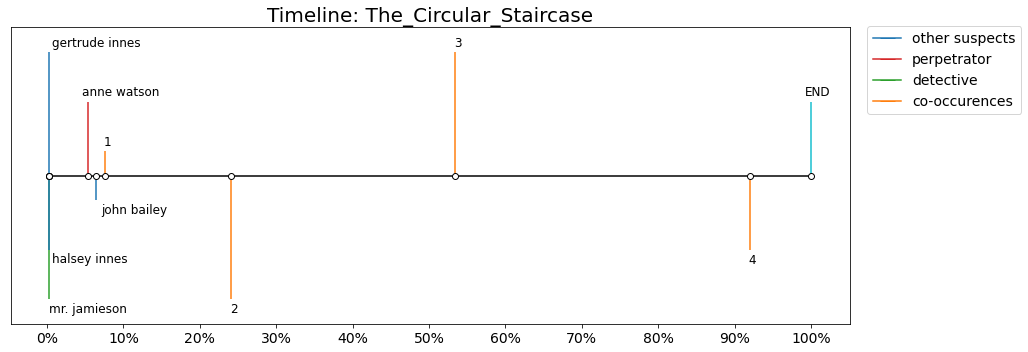

In [15]:
pl.make_timeline(book, locs, labels, colors, title)

# The Man in the Lower Ten - Analysis

In [16]:
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
title, metadata = list(books.items())[1]
# Create ProcessedBook Object
book = proc.ProcessedBook(title=title, metadata=metadata)
logger.info(f"URL: {book.url}")

2021-09-27 00:16:19 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:19 Config       INFO     Configuration Tag: proj1
2021-09-27 00:16:21 Notebook     INFO     URL: https://www.gutenberg.org/files/1869/1869-0.txt


In [17]:
# The three words preceding, and the three words following the mention of a perpetrator
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)
perp_three_words = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=False)
for name, results in perp_three_words.items():
    for sent_frag in np.unique(results[2]):
        print(sent_frag)

alison west and mrs. curtis had taken the
and came back. “mrs. curtis is dead? you
and just then mrs. curtis came in and
brain. and when mrs. curtis arranged drives and
for a year. mrs. curtis had hovered on
for twenty years. mrs. curtis wanted her brother
going about with mrs. curtis and her brother,
had learned. “six curtise
i have heard mrs. curtis say her mother
i know the alice-
in the night, mrs. curtis was in a
meeting with the curtis woman was brief
mrs. curtis had hovered on
night, miss west, mrs. curtis and sullivan. the
now and then mrs. curtis would say or
person you mentioned, mrs. curtis, was my hostess.
same car with mrs. curtis, miss west and
that. “it wasnt alice-
the estate since mrs. curtis was killed. “no
the mountains without mrs. curtis, of a lost
to my sister, alice curtis
was growing clearer. mrs. curtis and i had
was not like mrs. curtis. i wanted to
“go on.” if mrs. curtis knew, she never
“it wasnt alice-


In [18]:
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [19]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [20]:
# Get Mentions
crime_details_words = book.crime_details['or_words']
p_lookaheads = book.crime_details['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_details_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:21 Book Extractor INFO     Regex: (^.*(?:.*\s(?:body).*)$)

2021-09-27 00:16:22 Notebook     INFO     First mention: Chapter: 1, Sentence: 116
2021-09-27 00:16:22 Notebook     INFO     Then, without the slightest warning, as the train rounded a curve, a heavy body was thrown into my berth
2021-09-27 00:16:22 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:22 Notebook     INFO     First Instace: Chapter 1, Sentence 116
2021-09-27 00:16:22 Notebook     INFO     Last Instace: Chapter 1, Sentence 116
2021-09-27 00:16:22 Notebook     INFO     Crime Details: 
2021-09-27 00:16:22 Notebook     INFO     
Every nerve was tense: time passed, perhaps ten minutes, possibly half an hour. Then, without the slightest warning, as the train rounded a curve, a heavy body was thrown into my berth. The incident, trivial as it seemed, was startling in its suddenness, for although my ears were painfully strained and awake, I had heard no step outside. The next instant the cur

## Get Crime Type

In [21]:
# Get Mentions
crime_type_words = book.crime_type['or_words']
p_lookaheads = book.crime_type['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_type_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=1,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:22 Book Extractor INFO     Regex: (^.*(?=body)(?:.*\s(?:stabbed|shot).*)$)

2021-09-27 00:16:22 Notebook     INFO     First mention: Chapter: 12, Sentence: 113
2021-09-27 00:16:22 Notebook     INFO     Shortly before the collision, John Flanders, the conductor of the Flier, sent this telegram to the chief of police: “Body of Simon Harrington found stabbed in his berth, lower ten, Ontario, at six-thirty this morning
2021-09-27 00:16:22 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:22 Notebook     INFO     First Instace: Chapter 12, Sentence 113
2021-09-27 00:16:22 Notebook     INFO     Last Instace: Chapter 12, Sentence 113
2021-09-27 00:16:22 Notebook     INFO     Crime Details: 
2021-09-27 00:16:22 Notebook     INFO     
It has transpired that Simon Harrington, the Wood Street merchant of that city, was not killed in the wreck, but was murdered in his berth the night preceding the accident. Shortly before the collision, John Flanders, the conductor o

## Plotting

In [22]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

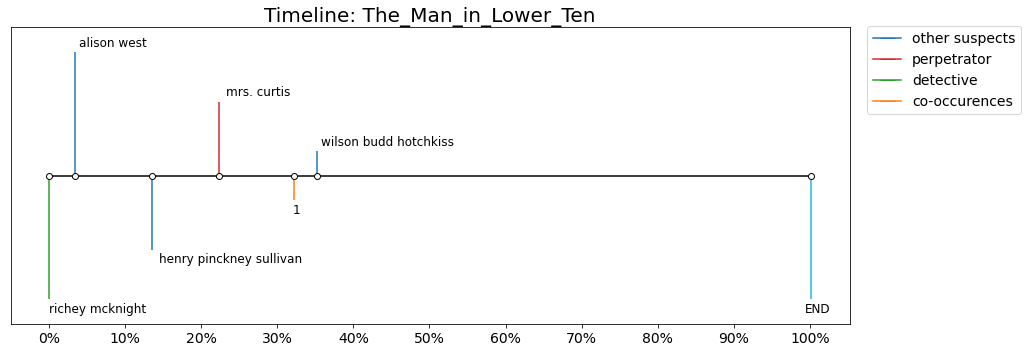

In [23]:
pl.make_timeline(book, locs, labels, colors, title)

# The After House - Analysis

In [24]:
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
title, metadata = list(books.items())[2]
# Create ProcessedBook Object
book = proc.ProcessedBook(title=title, metadata=metadata) 
logger.info(f"URL: {book.url}")
other_suspects = []

dets_perp = []

2021-09-27 00:16:22 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:22 Config       INFO     Configuration Tag: proj1
2021-09-27 00:16:24 Notebook     INFO     URL: https://gutenberg.org/files/2358/2358-0.txt


In [25]:
# The three words preceding, and the three words following the mention of a perpetrator
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)
perp_three_words = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=False)
for name, results in perp_three_words.items():
    for sent_frag in np.unique(results[2]):
        print(sent_frag)

after we anchored, charlie jones roused me, grinning.
along without him. charlie jones, always an influence
among the men. jones, from the tent,
among them all. jones, wrought to the
and adams and charlie jones, old in the
and called to charlie jones to send the
behind the crew, charlie jones had left the
boat astern, and charlie jones suggested a white
carried a lantern. charlie jones held singletons broken
charles klineordlinger (jones)
crew listened while jones read evening prayer.
crows-nest was mcnamara; jones was at the
didnt do that, charlie,
discovered no key. jones, seeing us searching,
easily behind us. jones heard me moving,
exclamation, and both jones and i leaped
eyes keenly alert, charlie jones was on guard,
five: clarke, mcnamara, charlie jones, burns, and myself;
from the decision. charlie jones, who, by reason
had not come. charlie jones, reading his bible
hands. she saw charlie jones pacing the length
happened to be charlie jones. jones was not
have called me, jones,


In [26]:
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [27]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [28]:
# Get Mentions
crime_details_words = book.crime_details['or_words']
p_lookaheads = book.crime_details['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_details_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=4,
                                           right_margin=0,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:24 Book Extractor INFO     Regex: (^.*(?=cut)(?:.*\s(?:pieces|dead|killed).*)$)

2021-09-27 00:16:24 Notebook     INFO     First mention: Chapter: 4, Sentence: 109
2021-09-27 00:16:24 Notebook     INFO     He had been almost cut to pieces with an axe
2021-09-27 00:16:24 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:24 Notebook     INFO     First Instace: Chapter 4, Sentence 109
2021-09-27 00:16:24 Notebook     INFO     Last Instace: Chapter 4, Sentence 109
2021-09-27 00:16:24 Notebook     INFO     Crime Details: 
2021-09-27 00:16:24 Notebook     INFO     
I went in and felt my way to his bunk. I could hear him breathing, a stertorous respiration like that of sleep, and yet unlike. The moment I touched him, the sound ceased, and did not commence again. I struck a match and bent over him. He had been almost cut to pieces with an axe


## Get Crime Type


In [29]:
# Get Mentions
crime_type_words = book.crime_type['or_words']
p_lookaheads = book.crime_type['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_type_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=4,
                                           right_margin=0,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:24 Book Extractor INFO     Regex: (^.*(?=cut)(?:.*\s(?:pieces|dead|killed).*)$)

2021-09-27 00:16:24 Notebook     INFO     First mention: Chapter: 4, Sentence: 109
2021-09-27 00:16:24 Notebook     INFO     He had been almost cut to pieces with an axe
2021-09-27 00:16:24 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:24 Notebook     INFO     First Instace: Chapter 4, Sentence 109
2021-09-27 00:16:24 Notebook     INFO     Last Instace: Chapter 4, Sentence 109
2021-09-27 00:16:24 Notebook     INFO     Crime Details: 
2021-09-27 00:16:24 Notebook     INFO     
I went in and felt my way to his bunk. I could hear him breathing, a stertorous respiration like that of sleep, and yet unlike. The moment I touched him, the sound ceased, and did not commence again. I struck a match and bent over him. He had been almost cut to pieces with an axe


## Plotting

In [30]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

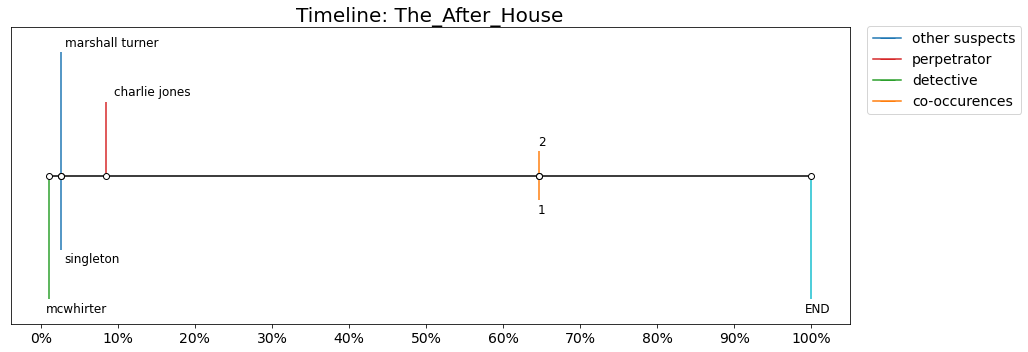

In [31]:
pl.make_timeline(book, locs, labels, colors, title)

# The Window at the White Cat - Analysis

In [32]:
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
title, metadata = list(books.items())[3]
# Create ProcessedBook Object
book = proc.ProcessedBook(title=title, metadata=metadata)
logger.info(f"URL: {book.url}")
other_suspects = []

dets_perp = []

2021-09-27 00:16:24 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:24 Config       INFO     Configuration Tag: proj1
2021-09-27 00:16:27 Notebook     INFO     URL: https://www.gutenberg.org/cache/epub/34020/pg34020.txt


In [33]:
# The three words preceding, and the three words following the mention of a perpetrator
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)
perp_three_words = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=False)
for name, results in perp_three_words.items():
    for sent_frag in np.unique(results[2]):
        print(sent_frag)

"do you think mrs. butler took your leather
all more normal. mrs. butler had slept some,
all. i met mrs. butler for the second
and learned that mrs. butler was sinking. fred
at least. fortunately, mrs. butler was exhausted by
been her father's. mrs. butler came around enough
chloroformed her, and mrs. butler'
den. as usual, mrs. butler left the room
edith who brought mrs. butler to my mind.
find the woman. mrs. butler came down to
for a week ellen butler hunted him vainly.
from the house. ellen butler had been horrified,
gown. it was ellen butler. she was living,
had lived with mrs. butler since she was
had said about ellen butler. she was conscious;
her to let mrs. butler go back to
i went to mrs. butler'
in her agony, ellen butler'
in honor of mrs. butler'
me. no doubt mrs. butler deserved sympathy, but
night about eleven. mrs. butler had come down
normal american womanhood; ellen butler the neurasthenic; she
one's sympathies. but mrs. butler was really ill,
picnic. "how is mrs. butl

In [34]:
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [35]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [36]:
# Get Mentions
crime_details_words = book.crime_details['or_words']
p_lookaheads = book.crime_details['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_details_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=3,
                                           right_margin=0,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:27 Book Extractor INFO     Regex: (^.*(?=fleming)(?:.*\s(?:shot|killed|murdered).*)$)

2021-09-27 00:16:27 Notebook     INFO     First mention: Chapter: 7, Sentence: 154
2021-09-27 00:16:27 Notebook     INFO     It was Allan Fleming and he had been shot through the forehead
2021-09-27 00:16:27 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:27 Notebook     INFO     First Instace: Chapter 7, Sentence 154
2021-09-27 00:16:27 Notebook     INFO     Last Instace: Chapter 7, Sentence 154
2021-09-27 00:16:27 Notebook     INFO     Crime Details: 
2021-09-27 00:16:27 Notebook     INFO     
"I beg your pardon," I said, "but I am looking, for--" Then the truth burst on me, overwhelmed me. A thin stream was spreading over the papers on the table, moving slowly, sluggishly, as is the way with blood when the heart pump is stopped. I hurried over and raised the heavy, wobbling, gray head. It was Allan Fleming and he had been shot through the forehead


## Get Crime Type

In [37]:
# Get Mentions
crime_type_words = book.crime_type['or_words']
p_lookaheads = book.crime_type['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_type_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=3,
                                           right_margin=0,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:27 Book Extractor INFO     Regex: (^.*(?=fleming)(?:.*\s(?:shot|killed|murdered).*)$)

2021-09-27 00:16:27 Notebook     INFO     First mention: Chapter: 7, Sentence: 154
2021-09-27 00:16:27 Notebook     INFO     It was Allan Fleming and he had been shot through the forehead
2021-09-27 00:16:27 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:27 Notebook     INFO     First Instace: Chapter 7, Sentence 154
2021-09-27 00:16:27 Notebook     INFO     Last Instace: Chapter 7, Sentence 154
2021-09-27 00:16:27 Notebook     INFO     Crime Details: 
2021-09-27 00:16:27 Notebook     INFO     
"I beg your pardon," I said, "but I am looking, for--" Then the truth burst on me, overwhelmed me. A thin stream was spreading over the papers on the table, moving slowly, sluggishly, as is the way with blood when the heart pump is stopped. I hurried over and raised the heavy, wobbling, gray head. It was Allan Fleming and he had been shot through the forehead


## Plotting

In [38]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

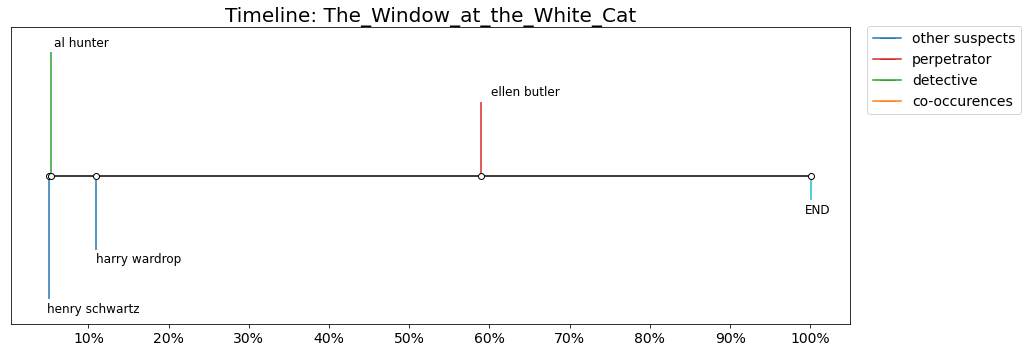

In [39]:
pl.make_timeline(book, locs, labels, colors, title)

# The Bat - Analysis

In [40]:
# Load Circlular Staircase example
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
title, metadata = list(books.items())[4]
# Create ProcessedBook Object
book = proc.ProcessedBook(title=title, metadata=metadata, bat=True)

2021-09-27 00:16:27 Config       INFO     Configuration file loaded successfully from path: /home/drkostas/GDrive/Projects/UTK/rinehartAnalysis/confs/proj_1.yml
2021-09-27 00:16:27 Config       INFO     Configuration Tag: proj1


In [41]:
# The three words preceding, and the three words following the mention of a perpetrator
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)
perp_three_words = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=False)
for name, results in perp_three_words.items():
    for sent_frag in np.unique(results[2]):
        print(sent_frag)

" lizzie demanded. "the bat has gone. "don't
"and the bat is not in
"bat baffles police again.
"down there, where the bat is. " lizzie
"ever since the bat got him i've
"i'd forget the bat in all this.
"it's the bat-
"still harping on the bat. stuck to her
"there's bats in this house,
-bat. " she murmured
-bat. voice
a chance at the bat, i'd give it
a chance at the bat. " repeated anderson
a chance at the bat. slowly
a chance at the bat. the chief drummed
a gigantic black bat.
about moving into the bat'
all summer long--and the bat would never disturb
an evil moon. the bat-
an infernal paper bat pinned where my
and drew a batt
and thinking--are you the bat. try it for
and yet--did the bat ever threaten before
be safe in the bath
belong to you. the batt
black cigar, a batt
body of a bat. of what happened
brooks. the bat.
burst forth with 'bat captured by blade
by lizzie. "it's the bat,
century--the yearned-for headline, "bat nabbed red-handed", "bat
chasing after this--this bat out of he

In [42]:
suspects, perp, dets, co_ocs, crime = extr.get_analysis_formats(metadata)

In [43]:
suspects = extr.get_earliest_chapter_sentence_from_name_lists(book, suspects, 3, first=True)
perp = extr.get_earliest_chapter_sentence_from_name_lists(book, perp, 3, first=True)
dets = extr.get_earliest_chapter_sentence_from_name_lists(book, dets, 3, first=True)
co_ocs = extr.get_co_occurence(book, co_ocs, n_sents=2)

## Get Crime Mentions, Details
Link the first mention with the next close mentions

In [44]:
# Get Mentions
crime_details_words = book.crime_details['or_words']
p_lookaheads = book.crime_details['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_details_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=2,
                                           right_margin=1,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:29 Book Extractor INFO     Regex: (^.*(?=shot)(?:.*\s(?:rang).*)$)

2021-09-27 00:16:29 Notebook     INFO     First mention: Chapter: 8, Sentence: 213
2021-09-27 00:16:29 Notebook     INFO     A single shot rang out
2021-09-27 00:16:29 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:29 Notebook     INFO     First Instace: Chapter 8, Sentence 213
2021-09-27 00:16:29 Notebook     INFO     Last Instace: Chapter 8, Sentence 213
2021-09-27 00:16:29 Notebook     INFO     Crime Details: 
2021-09-27 00:16:29 Notebook     INFO     
Then suddenly a bright shaft of light split the darkness of the alcove stairs like a sword, a spot of brilliance centered on Fleming's face like the glare of a flashlight focused from above by an invisible hand. For an instant it revealed him--his features distorted with fury--about to rush down the stairs again and attack the trembling girl at their foot. A single shot rang out.  For a second, the fury on Fleming's face seemed to cha

## Get Crime Type


In [45]:
# Get Mentions
crime_type_words = book.crime_type['or_words']
p_lookaheads = book.crime_type['positive_lookeaheads']
crime_mentions = extr.get_crime_mentions(book=book, 
                                         crime_words=crime_type_words,
                                         p_lookaheads=p_lookaheads,
                                         print_instances=False)
logger.nl()
first_crime_mention = crime_mentions[0]
logger.info(f"First mention: Chapter: {first_crime_mention[0]}, Sentence: {first_crime_mention[1]}",
            attrs=['underline'])
logger.info(f"{book.clean[first_crime_mention[0]][first_crime_mention[1]]}")
# Get Details
crime_details_tup = extr.get_crime_details(book=book, 
                                           crime_mentions=crime_mentions,
                                           max_dist=10,
                                           left_margin=3,
                                           right_margin=2,)
(first_crime_details, close_mentions_idx) = crime_details_tup
logger.info("Crime Details Location: ", attrs=['underline'], color='yellow')
logger.info(f"First Instace: Chapter {close_mentions_idx[0][0]}, "
            f"Sentence {close_mentions_idx[0][1]}")
logger.info(f"Last Instace: Chapter {close_mentions_idx[-1][0]}, "
            f"Sentence {close_mentions_idx[-1][1]}")
logger.info("Crime Details: ", attrs=['underline'], color='yellow')
logger.info(f"\n{first_crime_details}")

2021-09-27 00:16:29 Book Extractor INFO     Regex: (^.*(?=fleming)(?:.*\s(?:shot|stabbed).*)$)

2021-09-27 00:16:29 Notebook     INFO     First mention: Chapter: 8, Sentence: 244
2021-09-27 00:16:29 Notebook     INFO     "Richard Fleming--somebody shot him
2021-09-27 00:16:29 Notebook     INFO     Crime Details Location: 
2021-09-27 00:16:29 Notebook     INFO     First Instace: Chapter 8, Sentence 244
2021-09-27 00:16:29 Notebook     INFO     Last Instace: Chapter 8, Sentence 244
2021-09-27 00:16:29 Notebook     INFO     Crime Details: 
2021-09-27 00:16:29 Notebook     INFO     
"Who is he. " he said bluntly. Dale fought hysteria for some seconds before she could speak. "Richard Fleming--somebody shot him. " she managed to whisper at last. Anderson took a step toward her


# Plotting

In [46]:
locs, labels, colors = pl.create_locs_labels(book, suspects, perp, dets, co_ocs, crime)

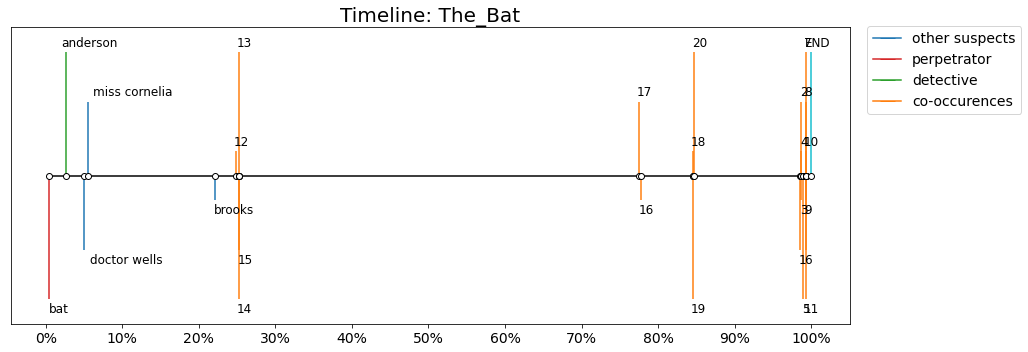

In [47]:
pl.make_timeline(book, locs, labels, colors, title)